In [22]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [2]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
model = SVC(kernel='rbf')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
model = SVC(kernel='poly')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
from sklearn.cross_validation import cross_val_score

cvscores = cross_val_score(model, X, y, cv = 5, n_jobs=-1)
print "CV score: {:.3} +/- {:.3}".format(cvscores.mean(), cvscores.std())

CV score: 0.98 +/- 0.0163


In [11]:
from sklearn.grid_search import GridSearchCV
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 0.5, 1, 3, 10]}
clf = GridSearchCV(model, parameters, n_jobs=-1)
clf.fit(X, y)
clf.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
clf.predict([[2.,2.]])

array([1])

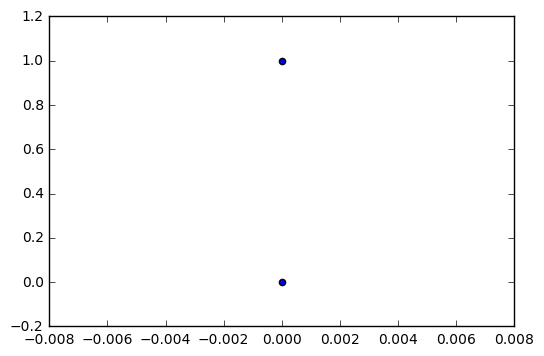

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[0],y)

>>> # get support vectors
>>> clf.support_vectors_
array([[ 0.,  0.],
       [ 1.,  1.]])
>>> # get indices of support vectors
>>> clf.support_ 
array([0, 1]...)
>>> # get number of support vectors for each class
>>> clf.n_support_ 
array([1, 1]...)


##Multi-class classification
decision function of shape (n_samples, n_classes):
>>> X = [[0], [1], [2], [3]]
>>> Y = [0, 1, 2, 3]
>>> clf = svm.SVC(decision_function_shape='ovo')
>>> clf.fit(X, Y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
>>> dec = clf.decision_function([[1]])
>>> dec.shape[1] # 4 classes: 4*3/2 = 6
6
>>> clf.decision_function_shape = "ovr"
>>> dec = clf.decision_function([[1]])
>>> dec.shape[1] # 4 classes
4


On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models. If there are only two classes, only one model is trained:
>>> lin_clf = svm.LinearSVC()
>>> lin_clf.fit(X, Y) 
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
>>> dec = lin_clf.decision_function([[1]])
>>> dec.shape[1]
4

